In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

plt.rc('figure', figsize=(10,7))
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.edgecolor'] = 'black'

### EDA (Exploratory Data Analysis)

- Idea first developed by John Tukey, 1977
- Seaborn has been written primarily by Micael Waskom
- ***`plt.hist(..., bins=[0,10,20,30...])`*** can also be a valid argument for ***bin edges***

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris['class'] = ['setosa' for _ in range(0,50)] + ['versicolor' for _ in range(50,100)] + ['virginica' for _ in range(100,150)]
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
129,7.2,3.0,5.8,1.6,virginica
9,4.9,3.1,1.5,0.1,setosa
72,6.3,2.5,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
12,4.8,3.0,1.4,0.1,setosa
26,5.0,3.4,1.6,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
136,6.3,3.4,5.6,2.4,virginica
114,5.8,2.8,5.1,2.4,virginica


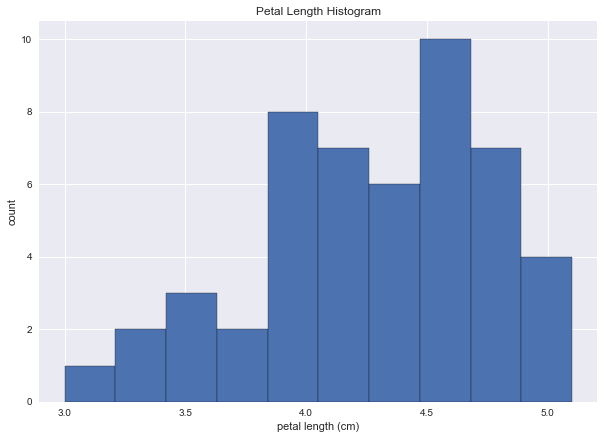

In [24]:
# Plot a histogram of the petal lengths of Iris versicolor
iris[iris['class'] == 'versicolor']['petal_length'].plot(kind='hist')
plt.title('Petal Length Histogram')
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.grid(True)
plt.show()

#### Adjusting the number of bins in a histogram!

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

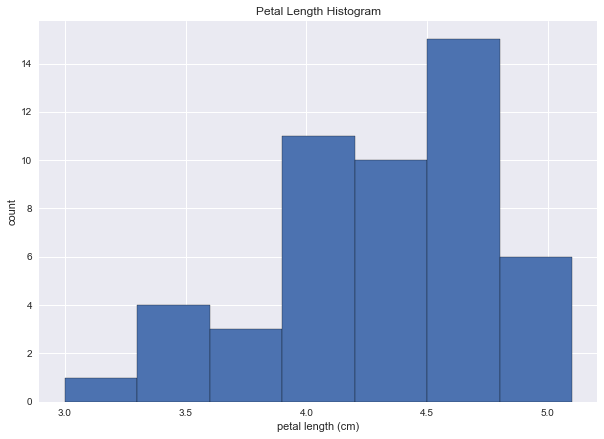

In [23]:
# Plot the above with the square root rule
num_samples = iris[iris['class'] == 'versicolor']['petal_length'].count()
bins = int(np.sqrt(num_samples))
iris[iris['class'] == 'versicolor']['petal_length'].plot(kind='hist', bins=bins)
plt.title('Petal Length Histogram')
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.grid(True)
plt.show()

### Plotting all of your data: Bee swarm plots

- Choice of bins in Histograms is in many ways arbitrary and so your interpretation of a Histogram really changes with changing number of bins
- This leads to ***Binning Bias*** (ie. you might interpret a histogram differently with different number of bins)
- To remedy these problems, we can make a Bee-Swarm plot
- ***`sns.swarmplot(df, x='', y='')`***

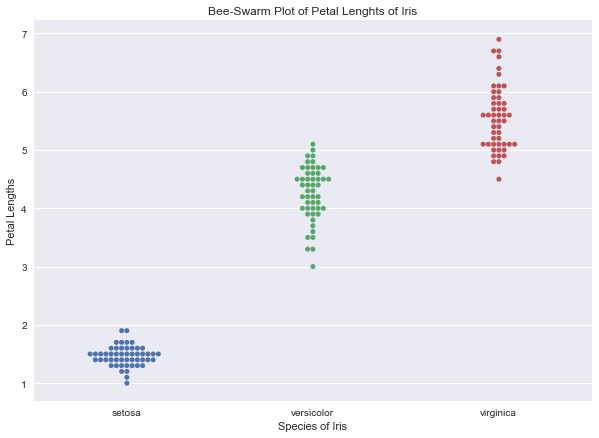

In [28]:
# Make a bee swarm plot of the iris petal lengths. 
# Your x-axis should contain each of the three species, and the y-axis the petal lengths.

sns.swarmplot(data=iris, x='class', y='petal_length')
plt.xlabel('Species of Iris')
plt.ylabel('Petal Lengths')
plt.title('Bee-Swarm Plot of Petal Lenghts of Iris')
plt.show()

#### ECDF or Percentile Plots

The Bee-Swarm plot becomes extremely cluttered with increasing number of data points (even 4000 data points!) and even overlapping points in order to fit everythin and so has limitations. For example...

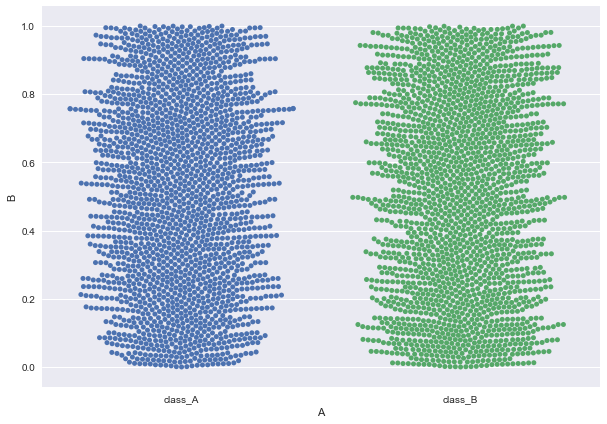

In [35]:
ex_df = pd.DataFrame({
    'A': ['class_A' for _ in range(0,2000)] + ['class_B' for _ in range(2000,4000)],
    'B': np.random.rand(4000)
})
sns.swarmplot(data=ex_df, x='A', y='B')
plt.show()

In order to overcome this, we can compute ECDF (Empirical Cumulative Distribution Function)

- X_Axis: Quantity that we are measuring
- Y_Axis: Fraction of Data Points that have a value ***smaller*** than the corresponding X-Axis value
- So you say that Y% of Y values had values ***less*** than X-values

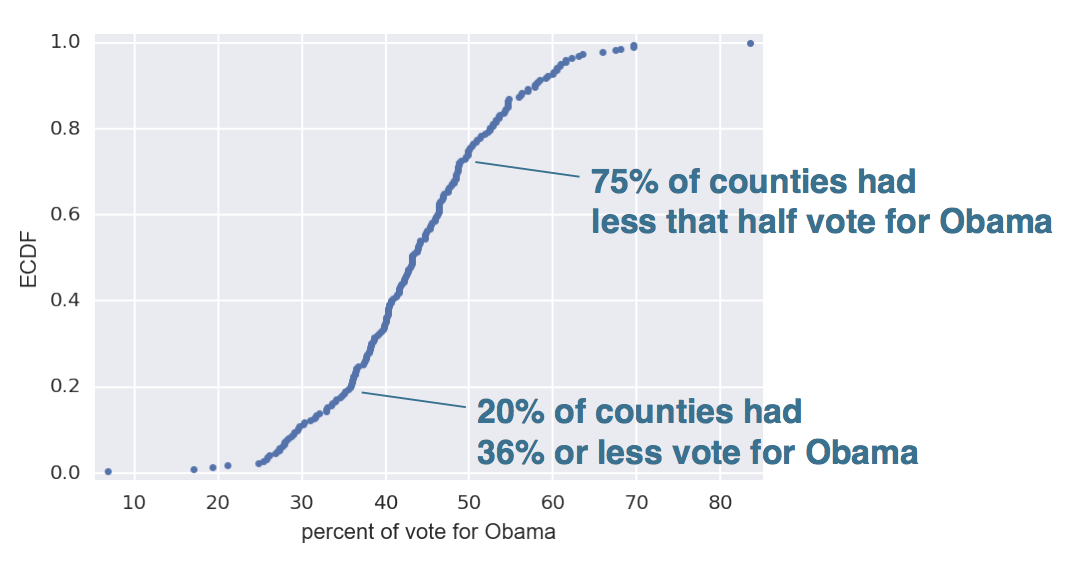

In [39]:
from IPython.display import Image
Image('ecdf.png', width=600, height=600)

Making an ECDF

- ***`x = np.sort(x_values)`***
- ***`y = np.arange(1, len(x)+1) / len(x)`***

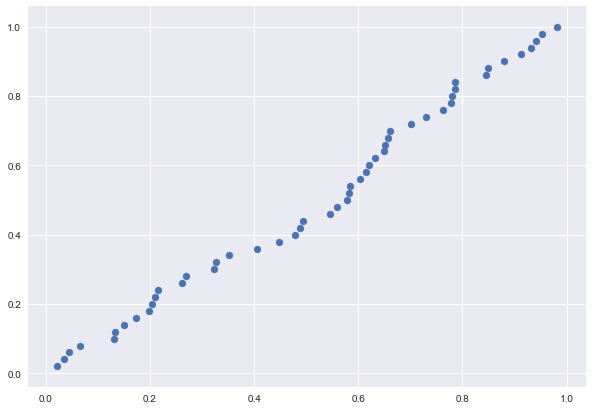

In [56]:
# Plot an ECDF
x = np.sort(np.random.rand(50))
y = np.arange(1, len(x)+1)/len(x)
plt.scatter(x,y)
plt.show()

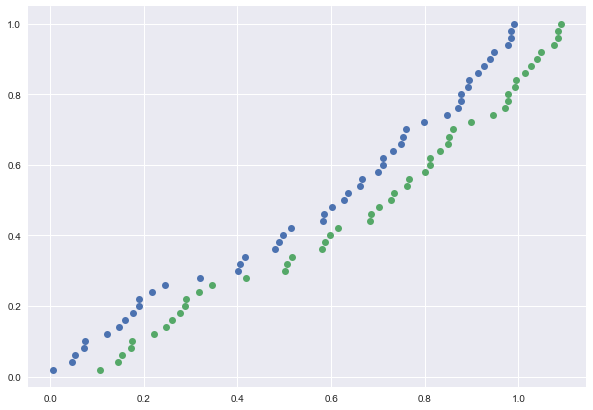

In [60]:
# Another way of doing the same thing
x = np.sort(np.random.rand(50))
x1 = x + 0.1
y = np.arange(1, len(x)+1)/len(x)
plt.plot(x, y, marker='o', linestyle='none')
plt.plot(x1, y, marker='o', linestyle='none')
plt.show()

You can have multiple ECDFS on the same graph. 
- 60% of Data Points were less than 0.8 for the green graph and 0.7 for the blue graph!

You can use ***`plt.margins(0.02)`*** to make sure that none of the data points run off the edges by a 2% buffer.

ECDFS are usually the first things you plot to see data distribution!

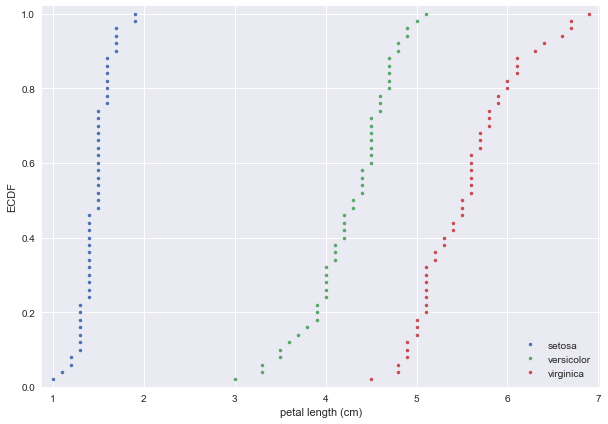

In [64]:
# Draw the ECDFs of Petal Lengths of all three species!
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x,y

x_set, y_set = ecdf(iris[iris['class'] == 'setosa']['petal_length'])
x_vers, y_vers = ecdf(iris[iris['class'] == 'versicolor']['petal_length'])
x_virg, y_virg = ecdf(iris[iris['class'] == 'virginica']['petal_length'])

plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')
plt.margins(0.02)
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

From above, Setosa is smaller in lengths and also has less variability!

#### Introduction to summary statistics: The sample mean and median

- Mean and Median
- Median is good summary statistic when there are outliers


#### Percentiles, outliers, and box plots

- ***`np.percentile(list or Series, float or sequence of floats between [1, 100])`***

#### Variance and standard deviation

- ***`np.var()`***
- ***`np.std()`*** or ***`np.sqrt(np.var())`***

#### Covariance and Pearson correlation coefficient

- We want a number that summarises how var1 ***varies*** with var2
- This ***Covariance*** is a measure of how two quantities vary together
- Covariance = Sigma(xi - x)(yi - y)/n
- It can be computed by ***`np.cov(x, y)`***
  - returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.
- Pearson Correlation = Covariance/std(x)\*std(y)
- Pearson Correlation ranges between -1 and 1
- the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the ***`np.corrcoef()`*** function. Like ***`np.cov()`***, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In [78]:
np.percentile(iris[iris['class'] == 'versicolor']['petal_length'], [25, 50, 75])

array([ 4.  ,  4.35,  4.6 ])

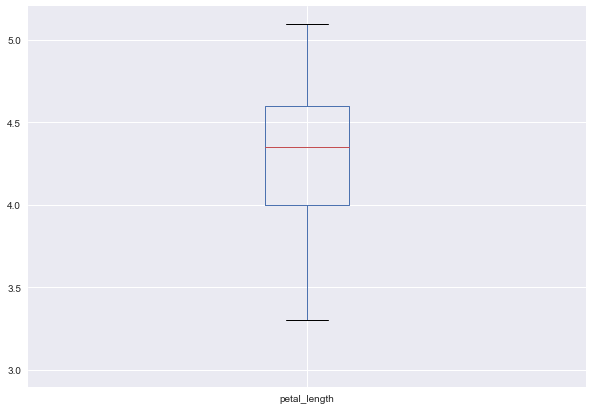

In [79]:
iris[iris['class'] == 'versicolor']['petal_length'].plot(kind='box')
plt.show()

- IQR can also be interpreted as the middle 50% of the values!
- The whiskers extend to 1.5 times the IQR or to the entire extent of data whicever is lesser!
- Being more than 2 IQRs away from the median can be considered as an outlier!

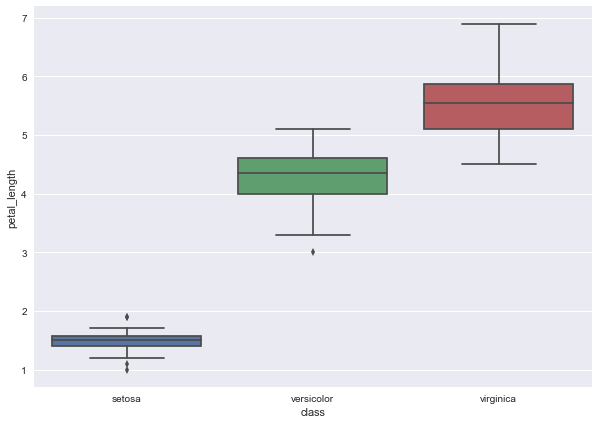

In [82]:
# Can also generate the above with seaborn
sns.boxplot(data=iris, x='class', y='petal_length')
plt.show()

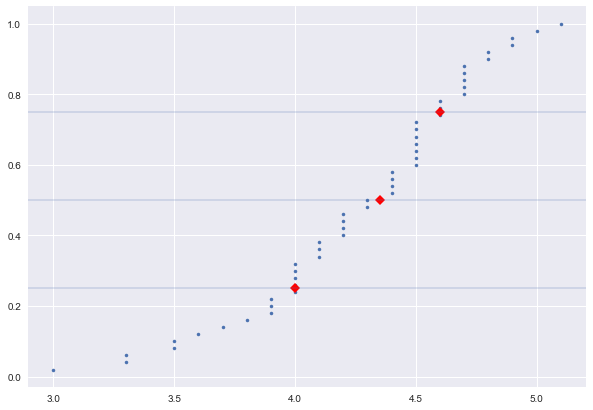

In [90]:
# Plot the ECDF and 25th, 50th and 75th Percentile of Versicolor Petal Lengths on the same graph!

x = iris[iris['class'] == 'versicolor']['petal_length']
x = np.sort(x)
y = np.arange(1, len(x)+1)/len(x)

percentiles = np.array([25, 50, 75])
p_values = np.percentile(x, percentiles)

plt.plot(x, y, marker='.', linestyle='none')
plt.plot(p_values, percentiles/100, marker='D', color='red', linestyle='none')

plt.axhline(0.25, alpha=0.2)
plt.axhline(0.50, alpha=0.2)
plt.axhline(0.75, alpha=0.2)
plt.show()

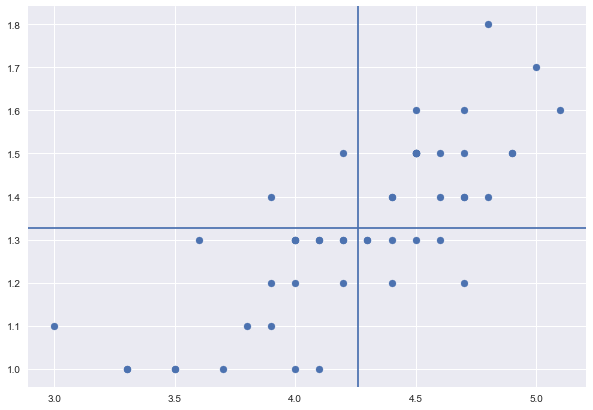

In [92]:
# Make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers
x = iris[iris['class'] == 'versicolor']['petal_length']
y = iris[iris['class'] == 'versicolor']['petal_width']
plt.axhline(np.mean(y))
plt.axvline(np.mean(x))
plt.scatter(x, y)
plt.show()

In [93]:
# Compute Covariance above
cov = np.cov(x, y)
print(cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]


### Probabilistic logic and statistical inference

- Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.
- Random number generators and hacker statistics


#### Bernoulli Trial

- An experiment that 2 options-> True (success) and False (failure)
- ***`np.random.seed()`*** to seed a simulation (hence the term pseudo random number generation)

In [97]:
# What is the probability of getting exactly 4 heads in 4 coin flips?
x = [[np.random.randint(0,2) for _ in range(4)] for _ in range(1000)]
x[0:5]

[[0, 0, 1, 0], [1, 1, 0, 0], [1, 0, 0, 1], [1, 1, 1, 1], [1, 1, 1, 1]]

In [101]:
sum_array = pd.Series([np.sum(y) for y in x])
probability = sum_array[sum_array == 4].count()/sum_array.count()
print(probability)

0.067


Note that this this is approximately same as 0.5\*\*4 ~ 0.0625

Let's repeat the above for more trials!

In [103]:
x = [[np.random.randint(0,2) for _ in range(4)] for _ in range(1000000)]
sum_array = pd.Series([np.sum(y) for y in x])
probability = sum_array[sum_array == 4].count()/sum_array.count()
print(probability)

0.062529


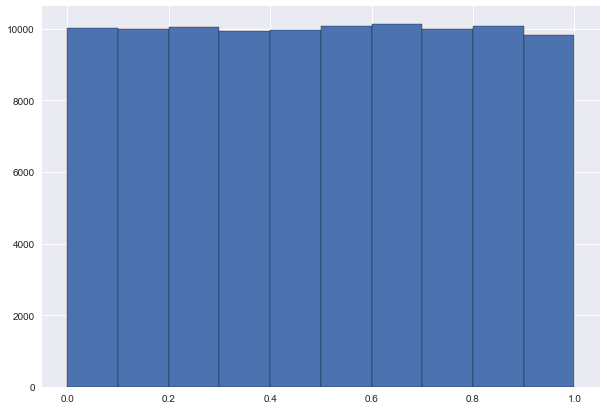

In [104]:
# Seed the random number generator
np.random.seed(42)
# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)
# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.rand()
# Plot a histogram
_ = plt.hist(random_numbers)
# Show the plot
plt.show()

Not above how ***`np.empty(size)`*** can be used to ***initialize*** empty Numpy arrays!

In [113]:
# Simulate the coin flip trial where the coin is biased with the probability of heads being 0.30
x = [[np.random.rand() for _ in range(4)] for _ in range(1000000)]
x[0:5]

[[0.529686275467939,
  0.8971016836159962,
  0.16502640118067213,
  0.5161012866388683],
 [0.11658198463374658,
  0.8853329644560831,
  0.2859407576136579,
  0.461264987963074],
 [0.20869477307315876,
  0.7158335885834665,
  0.7087940512265009,
  0.9160432035999196],
 [0.7691990169717793,
  0.5676305880597547,
  0.7117763273434484,
  0.13484260922395697],
 [0.6670578507736805,
  0.41781728239845584,
  0.8356314113777198,
  0.8963852174407997]]

In [114]:
sum_array = pd.Series([np.sum(np.array(y) < 0.3) for y in x])
probability = sum_array[sum_array == 4].count()/sum_array.count()
print(probability)

0.0081


Note that this is close to 0.3\*\*4 ~ 0.81

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05.

Simulate this for 1000 trials and plot a probability distribution.

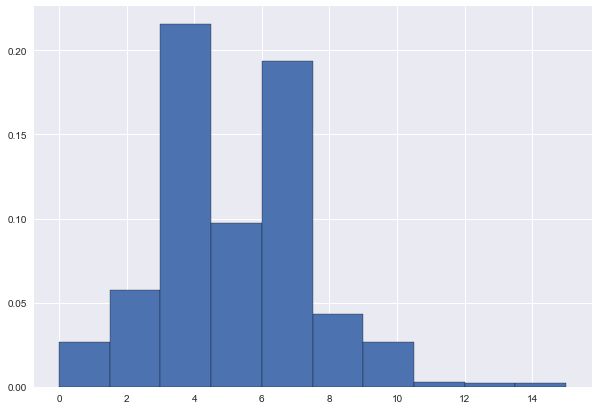

In [127]:
np.random.seed(42)
x = [[np.random.rand() for _ in range(100)] for _ in range(1000)]
sum_array = [np.sum(np.array(y) < 0.05) for y in x]
plt.hist(sum_array, normed=True)
plt.show()

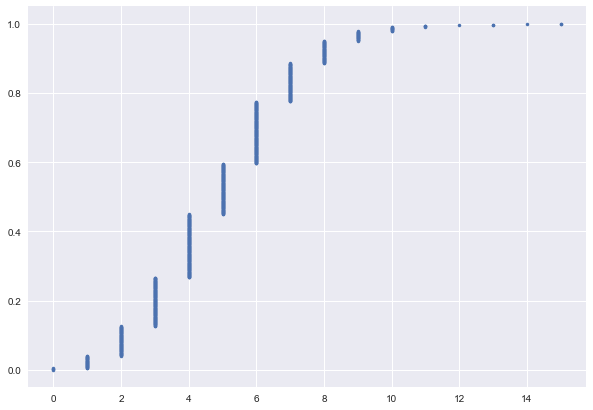

In [132]:
# Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF
sum_array_sorted = np.sort(sum_array)
y_vals = np.arange(1, len(sum_array_sorted)+1)/len(sum_array_sorted)
plt.plot(sum_array_sorted, y_vals, marker='.', linestyle='none')
plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [134]:
# Solution 1
sum_array_ser = pd.Series(sum_array)
probability = sum_array_ser[sum_array_ser >= 10].count()/sum_array_ser.count()
print(probability)

0.022


In [140]:
# Solution 2
# Look at the ECDF graph. 
# The corresponding y value of x=10 is the P(X < 10) and so 1 - P(X < 10) means the the probability of X>=10 or 
# P(X >= 10) which is what we need to find out. So you can look at the graph and find this!

### Probability distributions and stories: The Binomial distribution

- PMF: Set of probabilities of discrete items
- Sampling out of the binomial distribution -> ***`np.random.binomial(n samples, p of success, size)`***

##### Problem:

*Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05.*

*Simulate this for 1000 trials and plot a probability distribution.*

##### Method 1

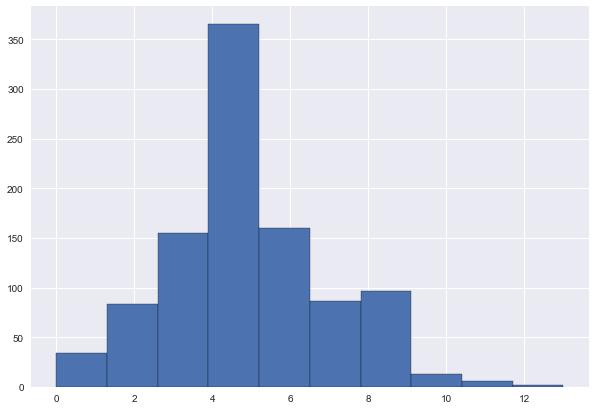

In [150]:
np.random.seed(23)
x = [[np.random.rand() for _ in range(100)] for _ in range(1000)]
sample = [np.sum(np.array(y) < 0.05) for y in x]
plt.hist(sample)
plt.show()

##### Method 2

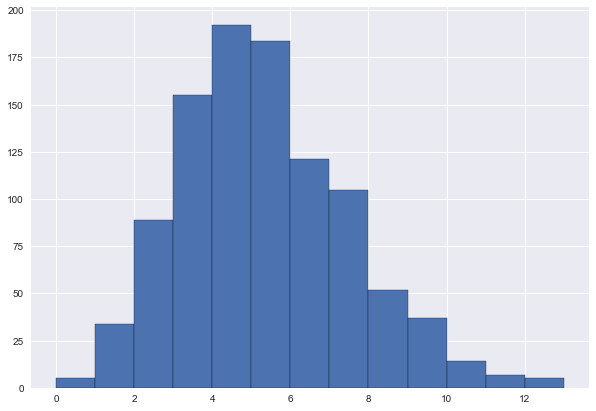

In [173]:
np.random.seed(23)
sample_2 = np.random.binomial(100, 0.05, size=1000)
plt.hist(sample_2, bins=13) # Refer to the next cell to see the reason why I have taken bins = 13 
plt.show()

Please note above that the bins are not centered on Integers! We will fix this next.

Use ***`plt.hist(data, bins=range(max(distribution)+1))`*** instead to get left-aligned bins, ***`plt.hist(data, bins=np.arange(max(distribution)+1)-0.5)`*** to get center-aligned bins, etc.

##### Plotting the Binomial PMF

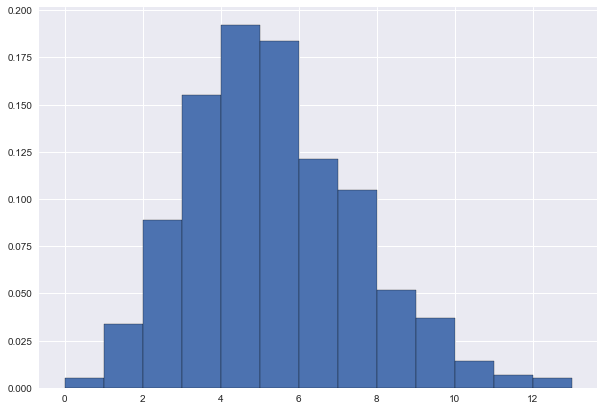

In [175]:
# Left Aligned
plt.hist(sample_2, bins=np.arange(max(sample_2)+1), normed=True)
plt.show()

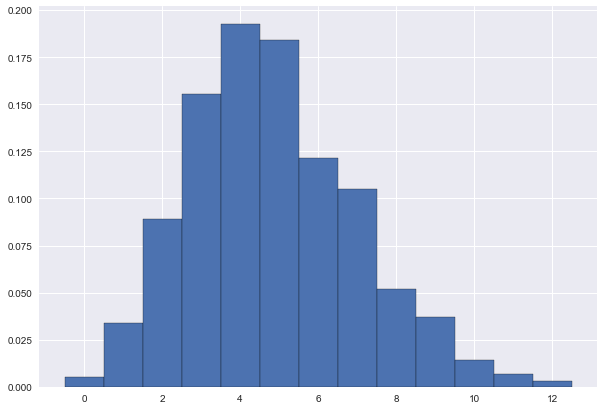

In [176]:
# Centre Aligned
plt.hist(sample_2, bins=np.arange(max(sample_2)+1) - 0.5, normed=True)
plt.show()

### Poisson processes and the Poisson distribution

- Poisson Process:
  - The timing of the next event is completely independent of when the previous event happened 
  - eg.: Natural Births in a hospital
  - Hits on a website during a given hour (the timing of the next hit is independent of the timing of the last)
  - Meteor Strikes
  - Molecular Collisions in a gas
  - Aviation Incidents
  - Buses in Poissonville
  
- Poisson Distribution
  - The number r of arrivals of a Poisson process in a given time interval with average rate of λ arrivals per interval is Poisson distributed.
  - The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.
  - ***`np.random.poisson(np, size)`***
  
*The Poisson Distribution is actually a limit of the Binomial Distribution with low probability of success and large number of trials* ie. ***for rare events***



In [179]:
np.random.poisson(6, size=100)

array([ 9,  6,  5, 10,  0,  7,  7,  6,  6,  6,  4,  5,  9,  3,  8,  6,  3,
        8,  4,  6,  7,  7, 10,  5,  4,  5, 10,  6,  5,  8,  6,  7,  9,  5,
        4,  6,  6, 11,  5,  4,  4,  6,  6,  3,  8,  7,  8, 10,  7,  6,  7,
        8,  6,  9,  8,  0,  2,  7,  6,  4,  8,  6,  3,  9,  8,  6, 10,  6,
        8, 13,  4,  7,  5,  8,  2,  5,  4,  3,  6,  9,  2,  6,  5,  5,  3,
        8,  8,  6,  7, 13, 11,  6,  3,  4,  3,  5, 10,  5,  3,  4])

*When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval*

Given that there on average 2.18 no-hitters in Baseball every season, what is the probability of getting 7 or more no-hitters in any given season?

In [181]:
samples = np.random.poisson(2.18, size=100000)
prob = np.sum(samples >= 7)/len(samples)
print(prob)

0.00719


### Probability density functions

- Continuous analog to the PMF
- Mathematical description of the ***relative likelihood*** of observing a value of a continuous variable
- And so probabilities are given by areas the under the curves
- Probability of speed of light = 299.98 units does not make sense because there can be infinite values like that like 299.981, 299.9812, 299.982 etc.


### Normal Distribution

- Describes a continuous variable whose PDF has a single symmetric peak.
- Mean = Median
- Parametrized by 2 Variables:
  - Mean
  - Std
- Mean of a Normal Distribution != Mean computed from Data
- Std of a Normal Distribution != Std computed from Data
- ***`np.random.normal(mean, std, size)`***
- To check whether a distribution is Normal or not
  - checking from histogram suffers from binning bias
  - instead, we can compute the mean and std and sample from ***`np.random.normal(calc_mean, calc_std, size)`***
  - We can then plot the two ecdfs from from the theretical and actual distribution and see the overlaps!

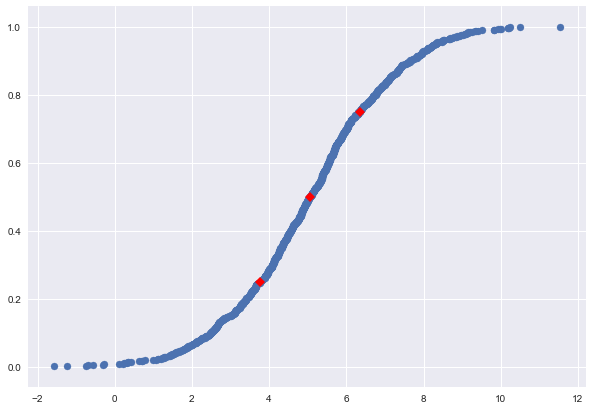

In [191]:
# Draw ECDF of a Normal Distribution with Mean = 5 and Std = 2
x = np.random.normal(5, 2, 1000)
x_sorted = np.sort(x)
y = np.arange(1, len(x_sorted)+1)/len(x_sorted)
percentiles = [25, 50, 75]
x_percentiles = np.percentile(x_sorted, percentiles)
plt.scatter(x_sorted,y)
plt.plot(x_percentiles, np.array(percentiles)/100, marker='D', color='red', linestyle='none')
plt.show()

Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.

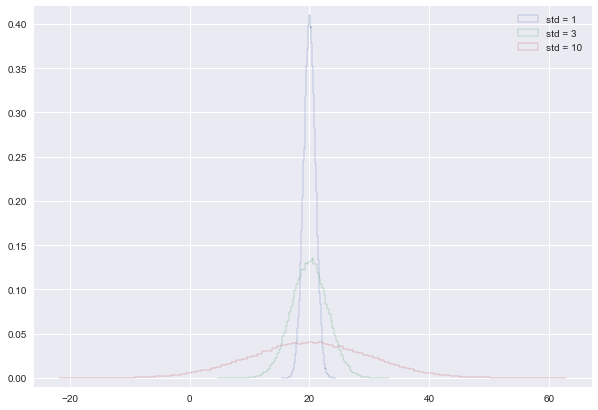

In [194]:
# Draw 100,000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step') # *histtype* makes the plot look much like the smooth theoretical PDF
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

Remember that the width of any CDF of a Normal Distribution varies with Std.! For example, in the following plot, you'll see that the distrbution with std = 10 is the widest!  

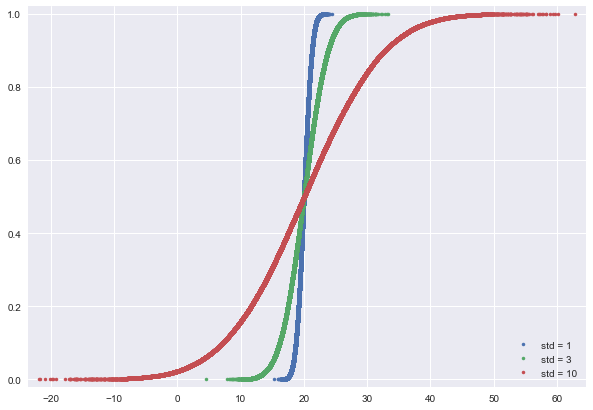

In [202]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### The Normal distribution: Properties and warnings

- Normal Distribution is also called the Gaussian Distribution
- Warnings
  - Check for overlap between theoretical Normal CDF and the ECDF of your distribution
  - Normal Distributions should not have outliers becase P(X > 4\*Std) is extremely rare

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [203]:
belmont_no_outliers = [ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ]

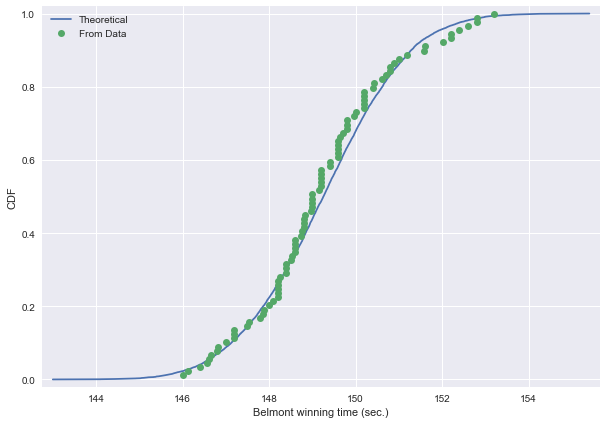

In [208]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='o', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.legend(('Theoretical', 'From Data'))
plt.show()

Hence, the distribution can be assumed to be Normal!

### The Exponential distribution

- The waiting times between arrivals of a Poisson Process are exponentially distributed.
- Single Parameter: Mean waiting time
- ***`np.random.exponential(mean_waiting_time, size)`***